# Evaluation Practice - bacth no -DS2309

# Loan Application Status Prediction

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [87]:
#Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [88]:
df.shape

(614, 13)

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [91]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [93]:
#from the results we can say 614 rows and 13 columns present in the dataset 
#there are 5 numeric nature columns and 8 non numerical nature columns present in the dataset
#Loan_Status is the target variable having Yes nor No nature . it is a catagorical nature
#Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
#There are three types of datatype dtypes: float64(4), int64(1), object(8)
#we need to have look about null values in details

In [94]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
#there are some null values or missing values present in dataset

<Axes: >

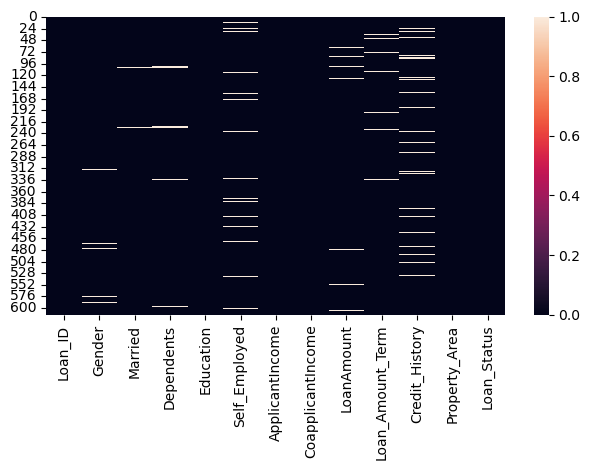

In [96]:
sns.heatmap(df.isnull())

In [97]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [98]:
#Cresit_History has lots of null value of missing value
#7 coulmns have null values or missing values

In [99]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [100]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [101]:
#Missing Value Check After Imputation
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<Axes: >

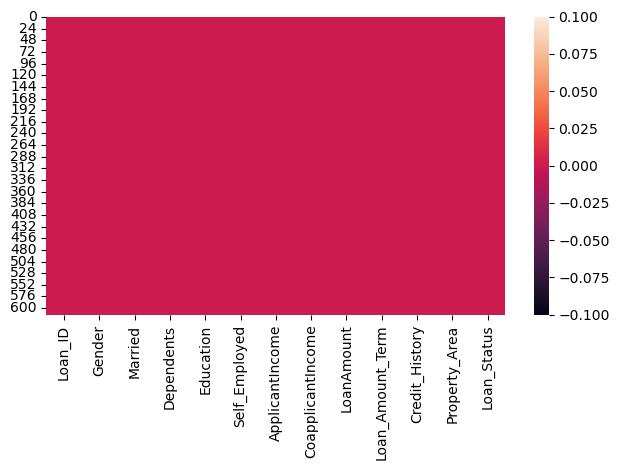

In [102]:
sns.heatmap(df.isnull())

In [103]:
#Now we can say ther is no null value or missing value

In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [105]:
##the counts of the columns are same which means there is no missing values
#In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
#there are outliers in Applicant Income , Coapplicant Income,Loan amount because the max is greater than 75% 
#Minimum Term for Loan is 12 Months and Maximum Loan tenure is 480 Months
#Minimum Applicant income is 150 and maximum is 81000.

In [106]:
#seperating numerical data and catagorical data
catagorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        catagorical_col.append(i)
print("catagorical columns",catagorical_col)
print("\n")

catagorical columns ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']




In [107]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("catagorical columns",numerical_col)
print("\n")

catagorical columns ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




<Axes: ylabel='Loan_Status'>

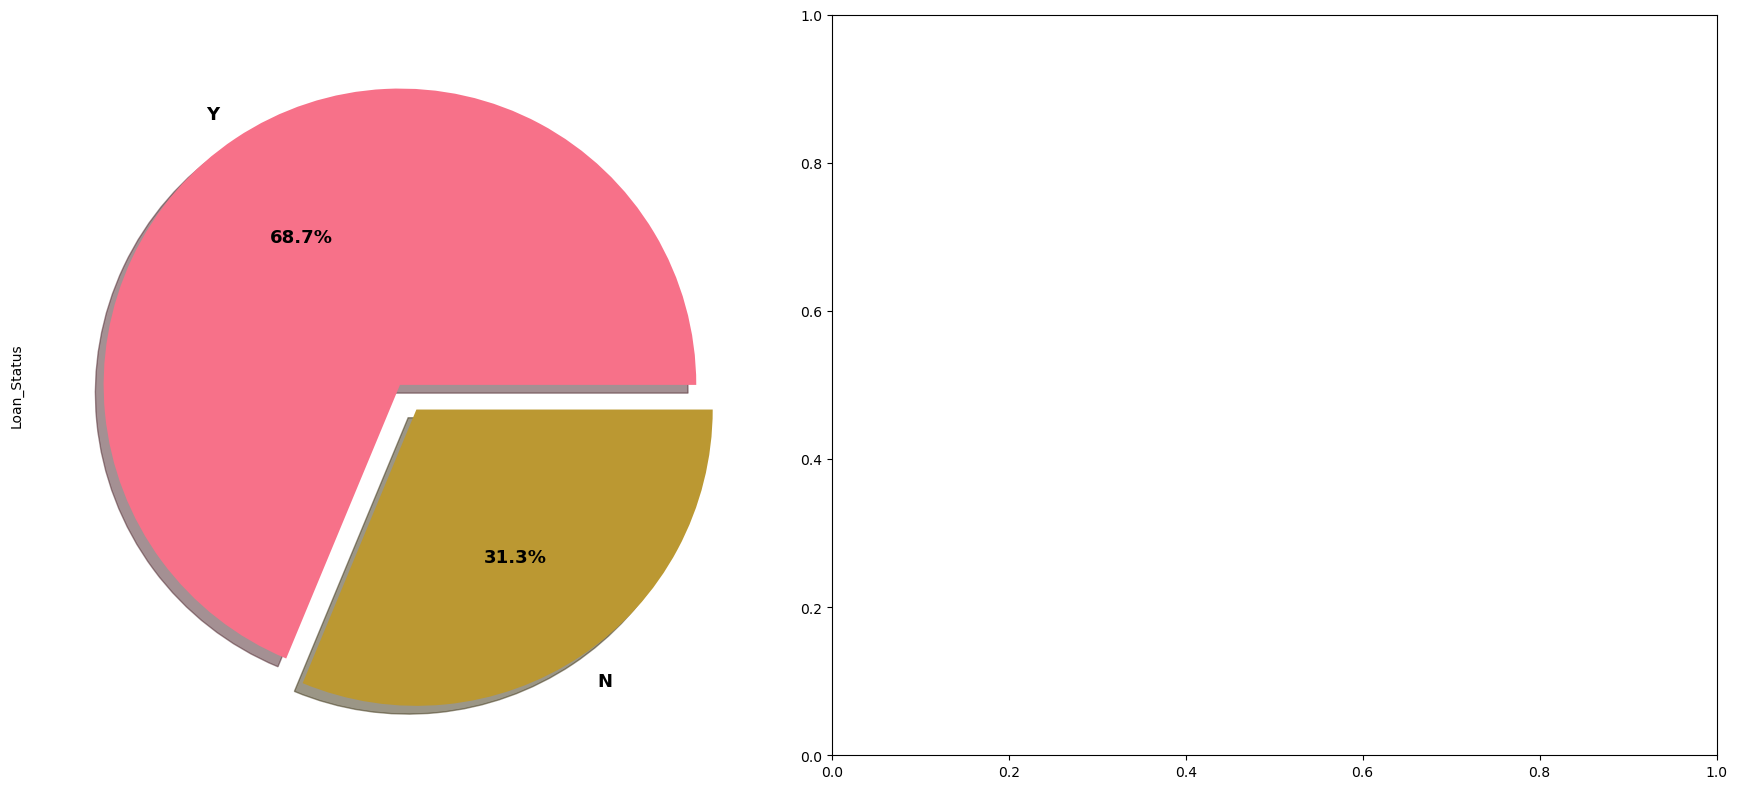

In [108]:
#Compare Target Variable with Features
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)


In [109]:
#68.7% Applicants gets loan Approval.
# We can see that dataset is imbalanced in nature.

Y    422
N    192
Name: Loan_Status, dtype: int64


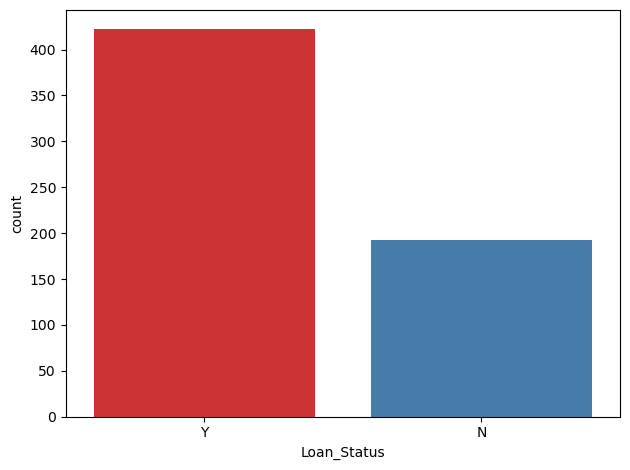

In [110]:
print(df["Loan_Status"].value_counts())
ax=sns.countplot(x='Loan_Status',data=df,palette='Set1')
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


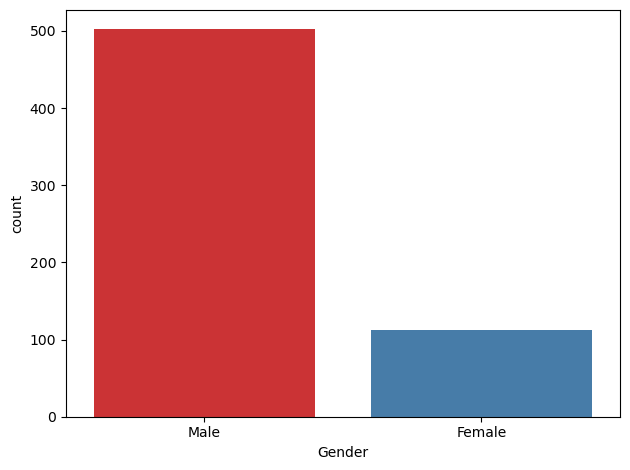

In [111]:
print(df["Gender"].value_counts())
ax=sns.countplot(x='Gender',data=df,palette='Set1')
plt.show()

In [112]:
#502 applicants are male that is 80% applicants are male 

Yes    401
No     213
Name: Married, dtype: int64


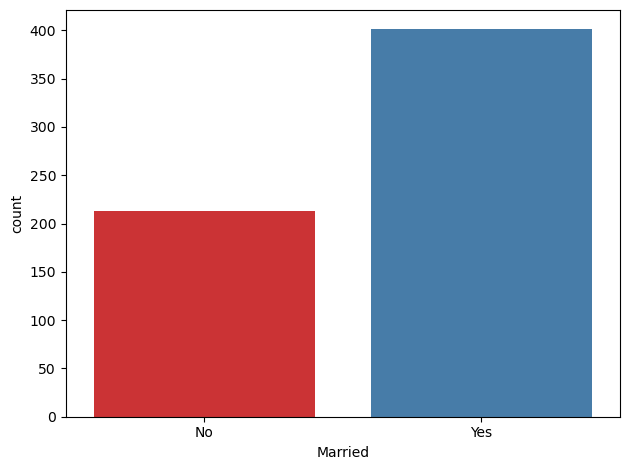

In [113]:
print(df["Married"].value_counts())
ax=sns.countplot(x='Married',data=df,palette='Set1')
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


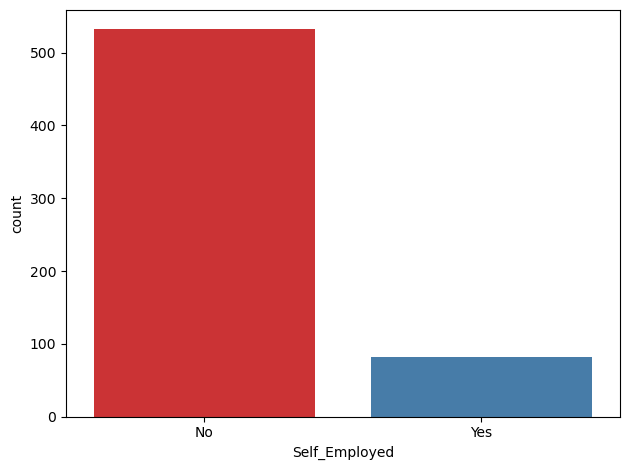

In [114]:
print(df["Self_Employed"].value_counts())
ax=sns.countplot(x='Self_Employed',data=df,palette='Set1')
plt.show()

In [115]:
#most of the applicants are employed 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


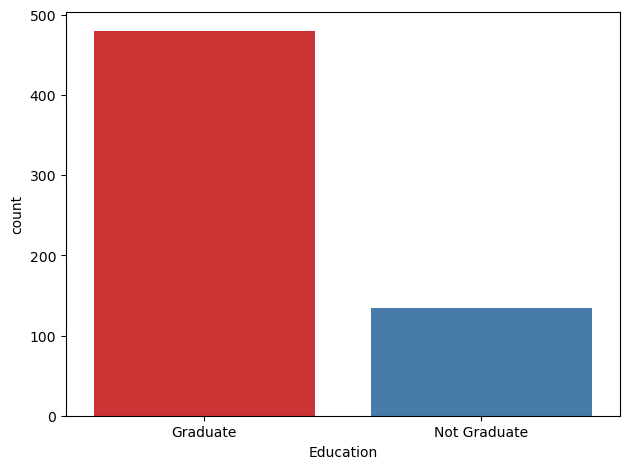

In [116]:
print(df["Education"].value_counts())
ax=sns.countplot(x='Education',data=df,palette='Set1')
plt.show()

In [117]:
#most of the applicants are graduate

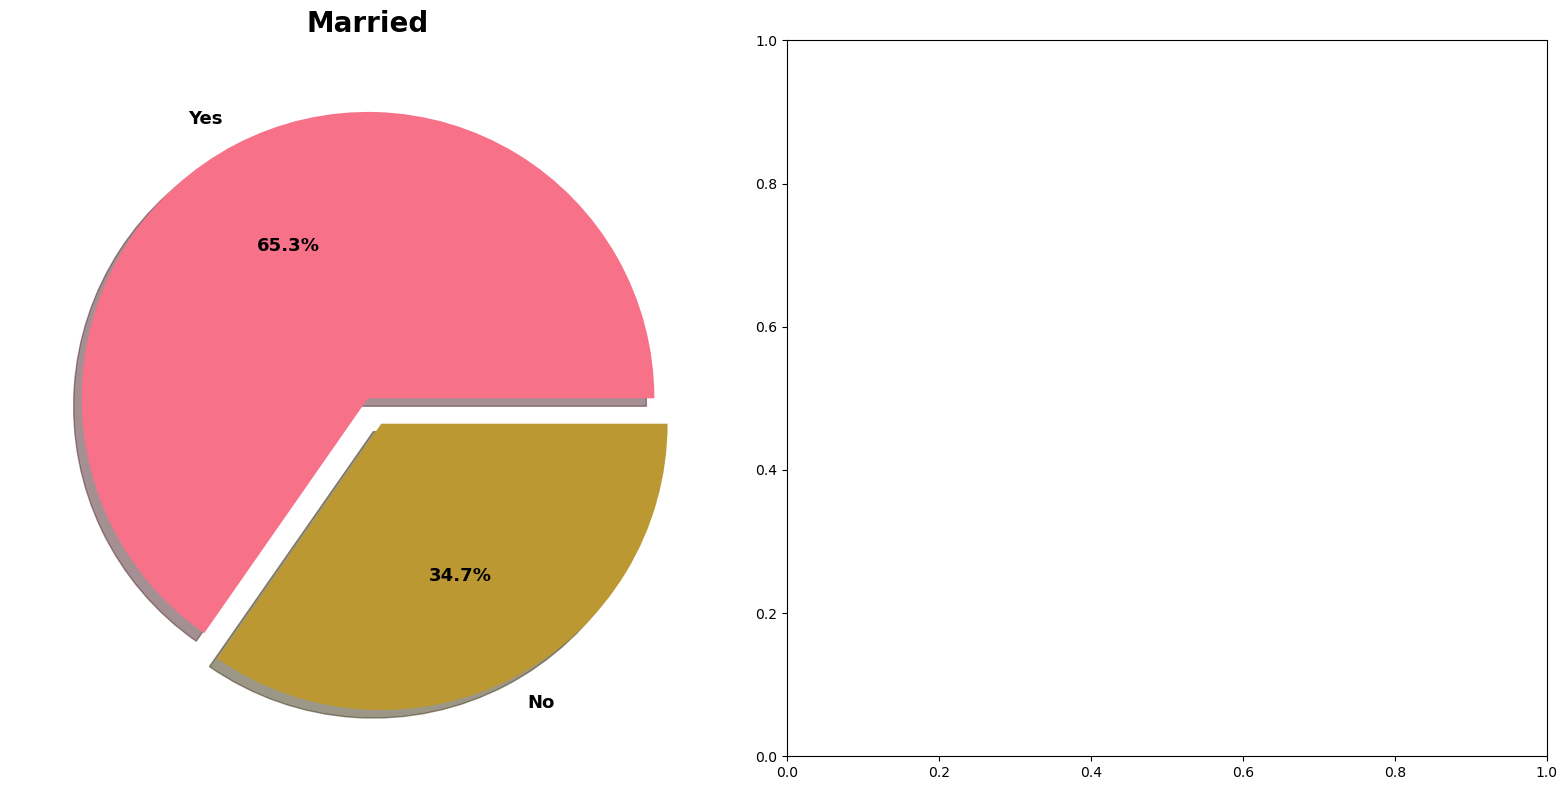

In [118]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
plt.tight_layout()
plt.show()

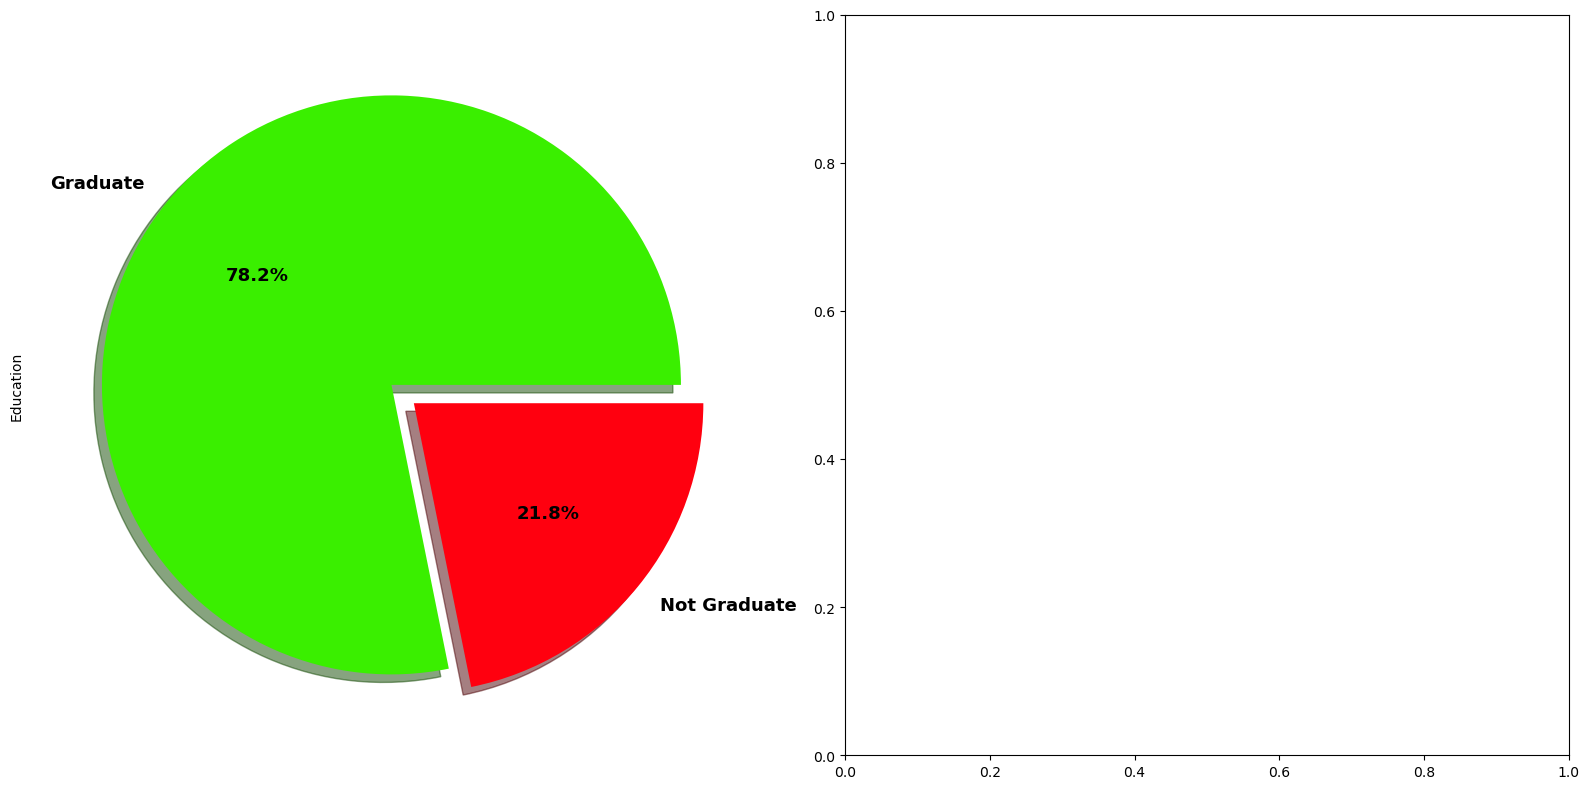

In [119]:
#Education Vs Loan status
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)

plt.tight_layout()
plt.show()

In [120]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in catagorical_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

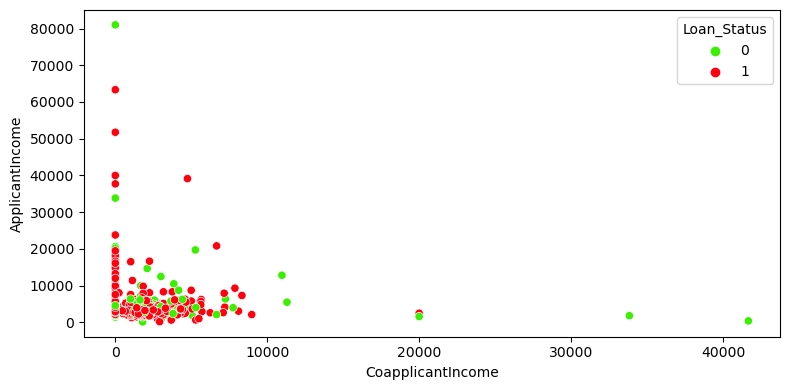

In [121]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',hue='Loan_Status',data=df)

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

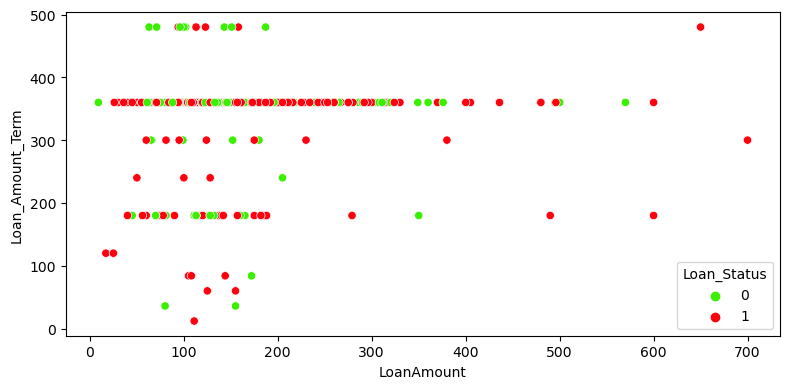

In [122]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',hue='Loan_Status',data=df)

# Feature selection and Engineering

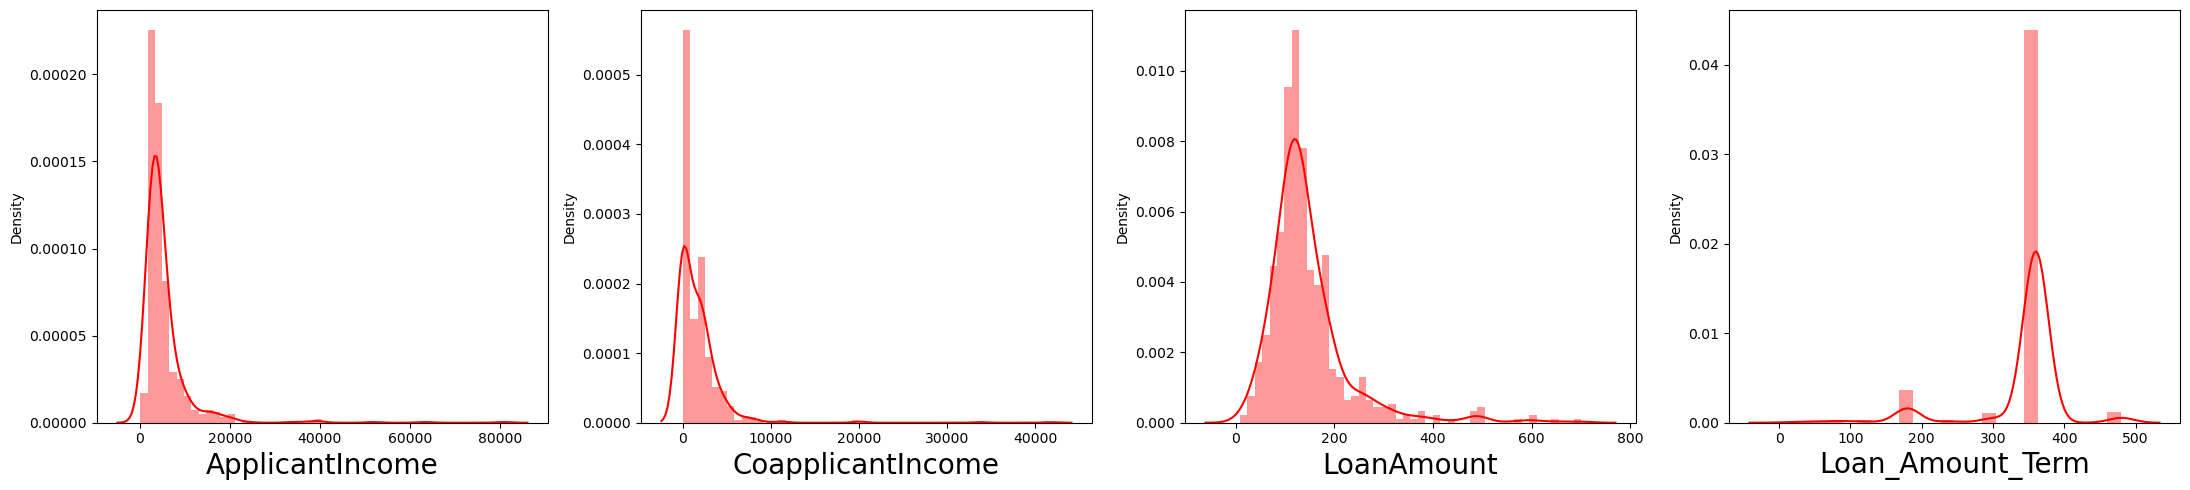

In [123]:
# 1. Skewness of Features
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in numerical_col:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [124]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [125]:
#ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
#We will yeo-johnson transformation method.
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931


In [126]:
#checking skewness after sorting it 
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [127]:
# 2. Outliers Detection and Removal

In [128]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

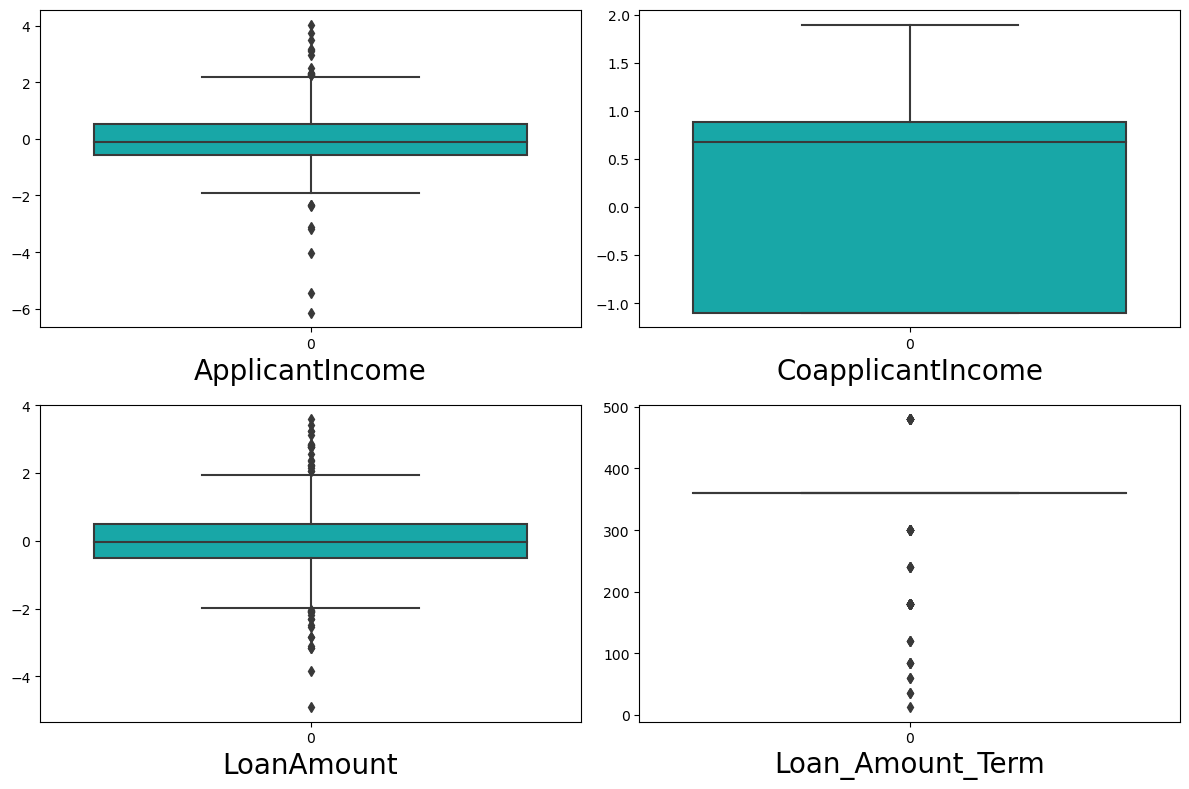

In [129]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [130]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [131]:
from scipy.stats import zscore

z=np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]))
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 185,
       188, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 500,
       546, 555, 561, 568, 575, 585, 600], dtype=int64), array([2, 3, 3, 2, 3, 2, 2, 3, 0, 2, 0, 2, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0,
       0, 3, 3, 0, 3, 2, 2, 2, 3, 3, 0], dtype=int64))


In [132]:
z=np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (586, 12)
Percentage of data loss post outlier removal:  4.5602605863192185


In [133]:
df=df1.copy()

In [134]:
df.shape

(586, 12)

In [135]:
#we can solved outliers in the dataset

In [136]:
# 3. Corrleation
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.368467,0.190053,0.045982,-0.007478,0.044069,0.239241,0.160623,-0.093792,0.017662,-0.024958,0.009882
Married,0.368467,1.000000,0.336890,0.019450,-0.009552,0.000297,0.321734,0.191802,-0.120760,0.017261,0.013478,0.084481
Dependents,0.190053,0.336890,1.000000,0.057741,0.062462,0.117033,0.007191,0.146653,-0.081227,-0.026206,-0.009991,0.008789
Education,0.045982,0.019450,0.057741,1.000000,-0.007847,-0.192549,0.048043,-0.147140,-0.091778,-0.077390,-0.070089,-0.090096
Self_Employed,-0.007478,-0.009552,0.062462,-0.007847,1.000000,0.202303,-0.080866,0.112743,-0.030121,-0.012430,-0.029580,-0.026971
ApplicantIncome,0.044069,0.000297,0.117033,-0.192549,0.202303,1.000000,-0.368692,0.511698,-0.041561,0.054511,-0.057785,-0.009709
CoapplicantIncome,0.239241,0.321734,0.007191,0.048043,-0.080866,-0.368692,1.000000,0.169732,-0.003123,-0.001446,-0.051053,0.063471
LoanAmount,0.160623,0.191802,0.146653,-0.147140,0.112743,0.511698,0.169732,1.000000,0.067922,0.005446,-0.098975,-0.040966
Loan_Amount_Term,-0.093792,-0.120760,-0.081227,-0.091778,-0.030121,-0.041561,-0.003123,0.067922,1.000000,0.026072,-0.050876,-0.024752
Credit_History,0.017662,0.017261,-0.026206,-0.077390,-0.012430,0.054511,-0.001446,0.005446,0.026072,1.000000,-0.006283,0.555136


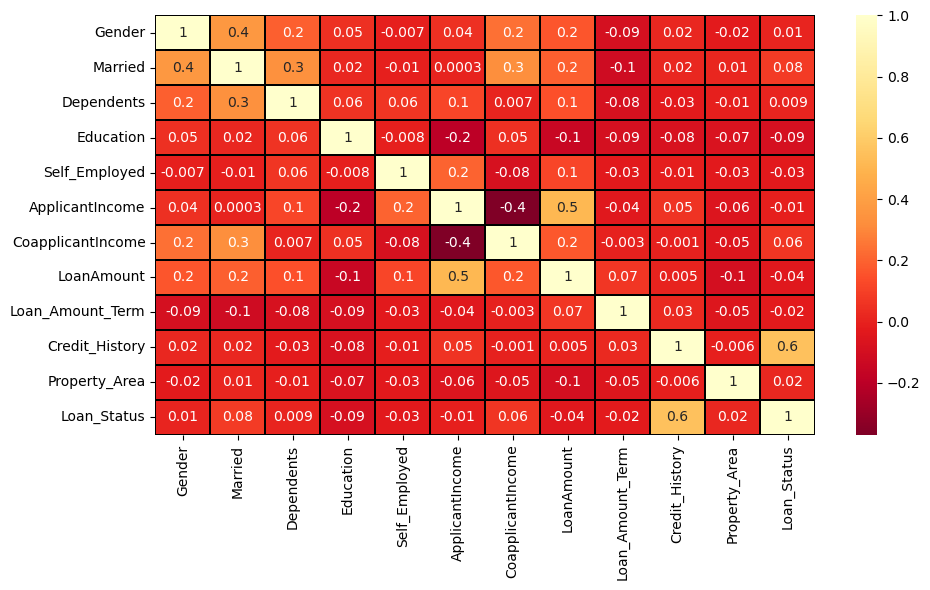

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="YlOrRd_r")
plt.yticks(rotation=0);
plt.show()

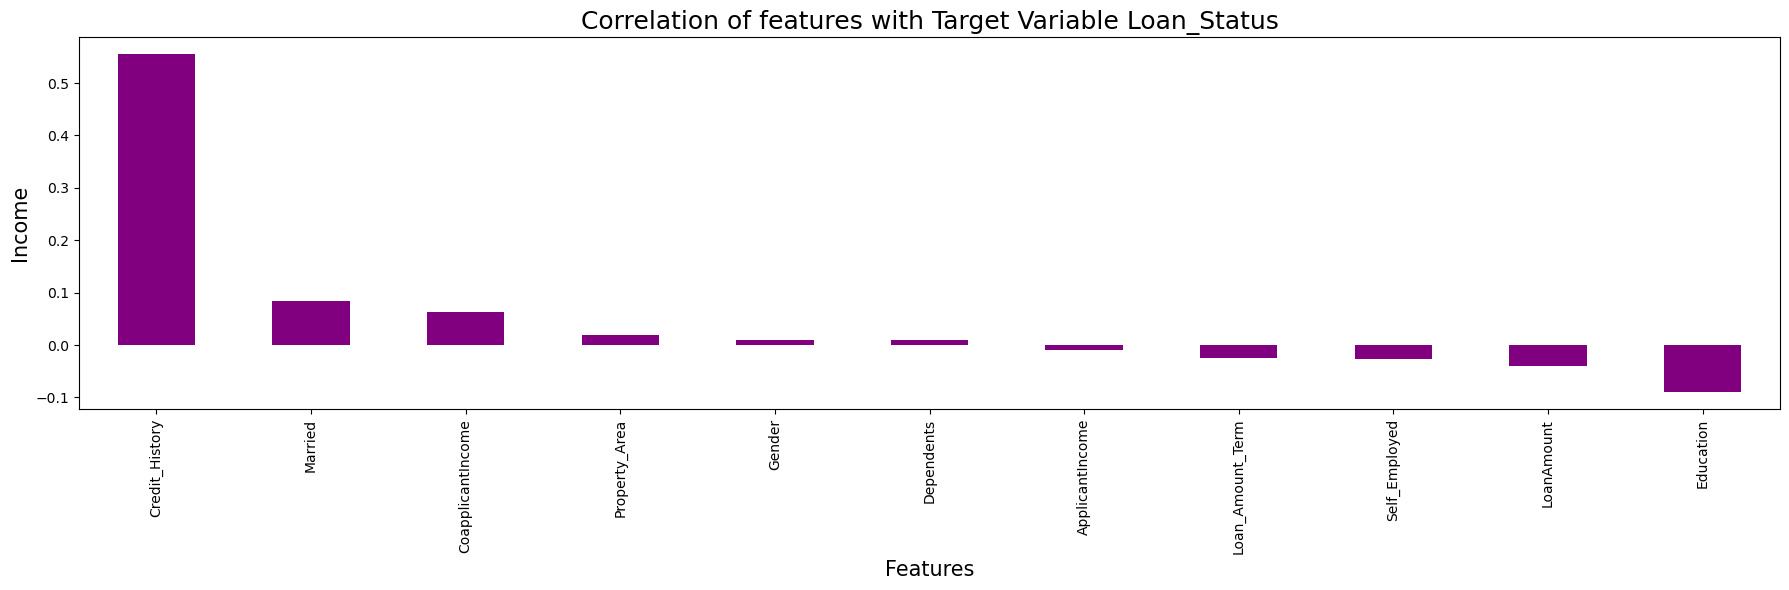

In [138]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [139]:
#Credit_history highly correlated to target variable and other variable are moderate correlated to LoanStatus
#ApplicantIncome highly positively correlated to LloanAmount

In [140]:
# 4. Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.276529,Gender
1,3.949501,Married
2,1.800604,Dependents
3,1.355108,Education
4,1.194124,Self_Employed
5,2.023395,ApplicantIncome
6,1.638531,CoapplicantIncome
7,1.750087,LoanAmount
8,10.639781,Loan_Amount_Term
9,9.483366,Credit_History


In [141]:
#all the features of VIF is in 10 so there won't be any Multicollinearity.

In [142]:
# 5. Balanceing Imbalanced target feature
df.Loan_Status.value_counts()

1    402
0    184
Name: Loan_Status, dtype: int64

In [143]:
# here target variable is inbalance for prediction so we need to balance them in the dataset for better prediction

In [144]:
#Balancing using SMOTE
# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

In [145]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [146]:
y.value_counts()

1    402
0    184
Name: Loan_Status, dtype: int64

In [147]:
y1.value_counts()

1    402
0    402
Name: Loan_Status, dtype: int64

In [148]:
# We have successfully resolved the class imbalanced problem

In [149]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467221,-1.368411,-0.730750,-0.533936,-0.383107,0.651151,-1.109711,-0.019347,0.234270,0.417551,1.226661
1,0.467221,0.730775,0.269763,-0.533936,-0.383107,0.208123,0.749691,-0.019347,0.234270,0.417551,-1.313351
2,0.467221,0.730775,-0.730750,-0.533936,2.610236,-0.588007,-1.109711,-1.485945,0.234270,0.417551,1.226661
3,0.467221,0.730775,-0.730750,1.872883,-0.383107,-0.877441,0.891255,-0.164866,0.234270,0.417551,1.226661
4,0.467221,-1.368411,-0.730750,-0.533936,-0.383107,0.696818,-1.109711,0.199793,0.234270,0.417551,1.226661
...,...,...,...,...,...,...,...,...,...,...,...
581,-2.140316,-1.368411,-0.730750,-0.533936,-0.383107,-0.653187,-1.109711,-1.327233,0.234270,0.417551,-1.313351
582,0.467221,0.730775,2.270789,-0.533936,-0.383107,0.004899,-1.109711,-2.553352,-3.285781,0.417551,-1.313351
583,0.467221,0.730775,0.269763,-0.533936,-0.383107,1.219721,0.205966,1.550447,0.234270,0.417551,1.226661
584,0.467221,0.730775,1.270276,-0.533936,-0.383107,1.110865,-1.109711,0.846514,0.234270,0.417551,1.226661


In [150]:
#we have the data using StandardScalar method to overcome the issue of biasness

# Machine Learning Model Building

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression

In [152]:
#finding best random state 

In [153]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    ls=LogisticRegression()
    ls.fit(x_train,y_train)
    pred=ls.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i;
print("Best accuracy score is ",maxaccu,"at random_state ",maxrs)

Best accuracy score is  0.8057851239669421 at random_state  16


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [156]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8181818181818182
[[ 30  26]
 [  6 114]]
              precision    recall  f1-score   support

           0       0.83      0.54      0.65        56
           1       0.81      0.95      0.88       120

    accuracy                           0.82       176
   macro avg       0.82      0.74      0.76       176
weighted avg       0.82      0.82      0.81       176



In [157]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8352272727272727
[[ 28  28]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.97      0.50      0.66        56
           1       0.81      0.99      0.89       120

    accuracy                           0.84       176
   macro avg       0.89      0.75      0.78       176
weighted avg       0.86      0.84      0.82       176



In [158]:
#SUPPORT VECTOR MACHINE CLASSIFIER
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8352272727272727
[[ 29  27]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67        56
           1       0.81      0.98      0.89       120

    accuracy                           0.84       176
   macro avg       0.87      0.75      0.78       176
weighted avg       0.85      0.84      0.82       176



In [159]:
#GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)

print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.75
[[ 27  29]
 [ 15 105]]
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        56
           1       0.78      0.88      0.83       120

    accuracy                           0.75       176
   macro avg       0.71      0.68      0.69       176
weighted avg       0.74      0.75      0.74       176



In [160]:
#ADA BOOST CLASSIFIER
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)

print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7727272727272727
[[ 25  31]
 [  9 111]]
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        56
           1       0.78      0.93      0.85       120

    accuracy                           0.77       176
   macro avg       0.76      0.69      0.70       176
weighted avg       0.77      0.77      0.75       176



In [161]:
#BAGGING CLASSIFIER
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)

print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.75
[[33 23]
 [21 99]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        56
           1       0.81      0.82      0.82       120

    accuracy                           0.75       176
   macro avg       0.71      0.71      0.71       176
weighted avg       0.75      0.75      0.75       176



In [163]:
#EXTRA TREE CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)

print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7897727272727273
[[ 30  26]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.73      0.54      0.62        56
           1       0.81      0.91      0.85       120

    accuracy                           0.79       176
   macro avg       0.77      0.72      0.74       176
weighted avg       0.78      0.79      0.78       176



In [164]:
#we can say SVC is the best model with accuracy score is 0.8352272727272727. so for better prediction we have to cross validation

In [165]:
#CROSS VALIDATIO SCORE
#Cross Validation for performance of data afer modeling 
# Cross validation for RandomForestClassifier
from sklearn.model_selection import cross_val_score
score1=cross_val_score(RFC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predRFC)-score1.mean())

[0.74534161 0.75776398 0.88198758 0.83229814 0.8875    ]
0.8209782608695653
Difference between accuracy Score and Cross validation score is -  -0.002796442687747036


In [166]:
##Checking cv score for Logistic Regression
score2=cross_val_score(LR,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predLR)-score2.mean())

[0.69565217 0.73913043 0.78881988 0.7826087  0.75      ]
0.7512422360248447
Difference between accuracy Score and Cross validation score is -  0.08398503670242796


In [167]:
#Checking cv score for GradientBoostClssifier
score3=cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predGB)-score3.mean())

[0.72670807 0.70186335 0.83850932 0.81987578 0.8       ]
0.7773913043478261
Difference between accuracy Score and Cross validation score is -  -0.027391304347826106


In [168]:
#Checking cv score for Support vector Machine Classifier
score4=cross_val_score(svc,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predsvc)-score4.mean())

[0.51552795 0.52173913 0.53416149 0.54658385 0.49375   ]
0.5223524844720496
Difference between accuracy Score and Cross validation score is -  0.3128747882552231


In [169]:
#Checking cv score for Support vector Bagging Classifier
score5=cross_val_score(BC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predBC)-score5.mean())

[0.73291925 0.7826087  0.85093168 0.7826087  0.83125   ]
0.7960636645962733
Difference between accuracy Score and Cross validation score is -  -0.04606366459627331


In [170]:
#Checking cv score for Support vector Extra Trees Classifier
score6=cross_val_score(ET,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predET)-score6.mean())

[0.73913043 0.79503106 0.85093168 0.8757764  0.875     ]
0.8271739130434783
Difference between accuracy Score and Cross validation score is -  -0.03740118577075102


In [171]:
#We can see that Logistic Regression gives us good Accuracy along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

In [172]:
# hyper parameter turning
from sklearn.model_selection import GridSearchCV
parameters={'dual':[True,False],
           'penalty':['l1','l2','elasticnet',None],
           'C':[1,0,2.5,3.0],
            'fit_intercept':[True,False],
            'random_state':[1,2,5]
            }
            
gscv=GridSearchCV(LogisticRegression(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0, 2.5, 3.0], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [1, 2, 5]})

In [173]:
gscv.best_params_

{'C': 1,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2',
 'random_state': 1}

In [179]:
#check modell again with parameters to get best performance
f_model=LogisticRegression(C=1,dual=False,fit_intercept=True,penalty='l2',random_state=1)
f_model.fit(x_train,y_train)
pred=f_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


83.52272727272727


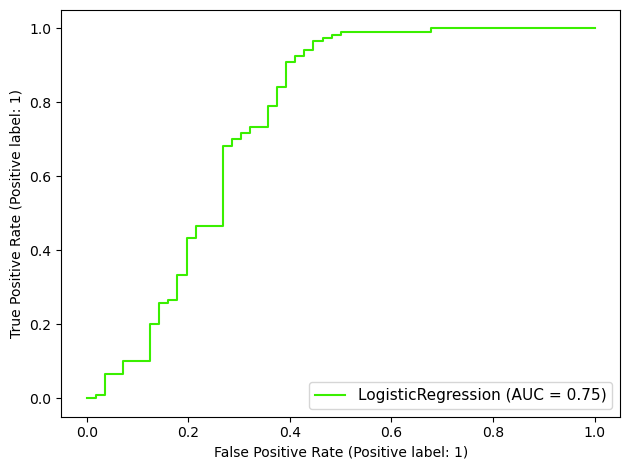

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8352272727272727


In [191]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(f_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
print('\033[1m'+'Auc Score :'+'\033[0m\n',acc)

In [192]:
#we can conclude the LogisticRegression is the best model with good accuracy

In [193]:
# Saving the model
import joblib
joblib.dump(f_model,"Loan_Application_Status_project.pkl")

['Loan_Application_Status_project.pkl']

In [194]:
#predicting the saved model
model=joblib.load("Loan_Application_Status_project.pkl")
a=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
a

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
predicted,1,0,1,0,1,0,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
original,1,0,1,0,0,0,0,1,1,1,...,1,0,1,1,0,1,1,0,1,0
